![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# K-Means

### Notebook de Noe 👻👻

### **Definición de la Clase**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = {}


        # Initialize the centroids randomly
        for i in range(self.n_clusters):
            self.centroids[i] = X[i]
        for i in range(self.max_iter):
            self.clusters = {}
            self.min_distance = []
            self.distances_arr = []
            for j in range(self.n_clusters):
                self.clusters[j] = []
            # Assign each data point to the closest centroid
            for x in X:
                # Get point distance to all centroids
                distances = [np.linalg.norm(x - self.centroids[c]) for c in self.centroids]
                # Get idx for min distance
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(x)
                self.distances_arr.append(distances)
                self.min_distance.append(distances[cluster])
            # Update the centroids
            prev_centroids = dict(self.centroids)

            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
            # Check for convergence
            is_converged = True
            for c in self.centroids:
                if not np.array_equal(self.centroids[c], prev_centroids[c]):
                    is_converged = False
                    break
            if is_converged:
                break
        return self.centroids,  self.distances_arr, self.clusters


    def predict(self, X):
        distances = [np.linalg.norm(X - self.centroids[c]) for c in self.centroids]
        cluster = distances.index(min(distances))
        return cluster

    def inertia(self):
        # Inertia is the sum of squared distance of samples to their closest cluster center
        return np.sum(np.array(self.min_distance)**2)

    def silohuette(self):
        # TODO
        pass

    def intra_cluster_distance(self):
        d_intra_cluster = []
        for i in range(self.n_clusters):
            d_intra_cluster.append(np.linalg.norm(self.clusters[i] - self.centroids[i]))
        d_ic = np.array(d_intra_cluster)
        return d_intra_cluster, d_ic, d_ic.mean()




![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Probamos el algoritmo con un conjunto básico de datos

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
import numpy as np

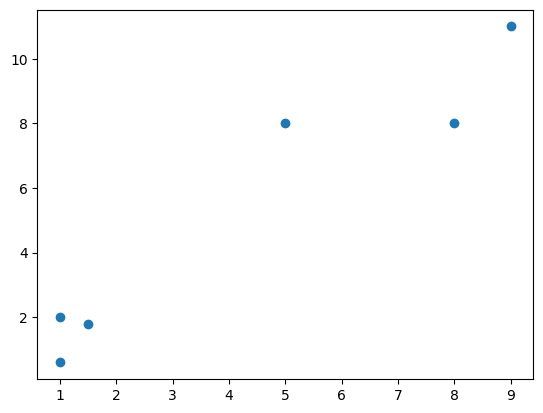

In [ ]:
# Pre-visualizamos los datos
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

plt.scatter(X[:,0], X[:,1])


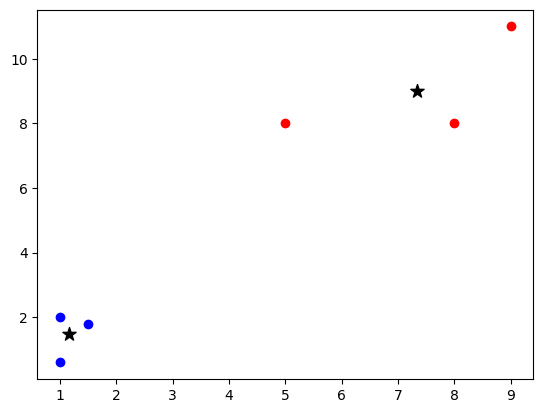

In [ ]:
# Instanciamos un modelo Kmeans con K=2
kmeans = KMeans(n_clusters=2)

# Entrenamos el modelo
kmeans.fit(X)

# Warning!! no usar mas de 2 clusters porque tira error porque solo defini 2 colores
colors = ["b", "r"]

for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="k", marker="*", s=100)

plt.show()


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Ahora probamos con el Iris dataset

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
from sklearn import datasets
from random import randint

iris = datasets.load_iris()


In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_iris = iris.data
y_iris = iris.target
labels = iris.feature_names

In [ ]:
labels

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X_iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

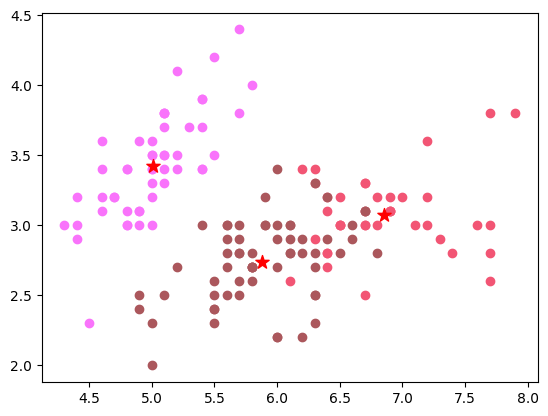

In [ ]:

# El dataset iris tiene 3 features
nro_clusters = 3

# Generamos un color para cada cluster
several_colors = []

# Para evitar el posible error de las celda anterior, genero tantos colores como clusters
for i in range(200):
    several_colors.append('#%06X' % randint(0, 0xFFFFFF))
sc = np.array(several_colors)

colors = np.random.choice(sc, size=nro_clusters, replace=True, p=None)

# Genero el modelo
kmeans = KMeans(n_clusters=nro_clusters)
# Entreno el modelo
kmeans.fit(X_iris)



# Ploteo los resultados
for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="r", marker="*", s=100)

plt.show()


---
### Elbow method to get best K

---

[K= 2]  intra_cluster_distance() --> [11.12635953  5.34341421]    average -->8.234886870140596 
[K= 3]  intra_cluster_distance() --> [5.04121475 6.18795763 3.89242855]    average -->5.04053364366964 
[K= 4]  intra_cluster_distance() --> [4.3247471  3.76466239 3.89242855 3.03790864]    average -->3.7549366699407205 
[K= 5]  intra_cluster_distance() --> [4.3247471  3.76466239 1.7646787  3.03790864 2.15190945]    average -->3.008781256313278 
------------------------------------------------------------------------------


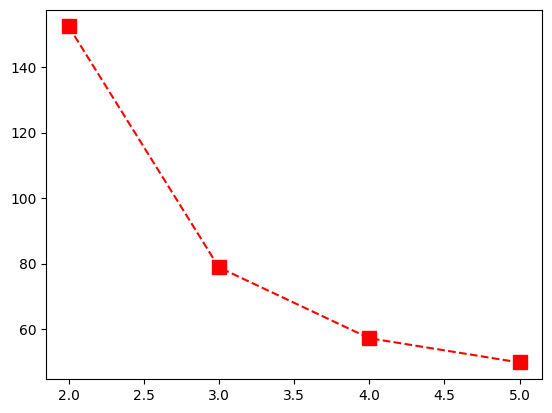

In [ ]:
inertia = []
for K in range(2,6):

    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X_iris)
    inertia.append(kmeans.inertia())
    _ , ic_d, ic_d_mean = kmeans.intra_cluster_distance()
    print(f"[K= {K}]  intra_cluster_distance() --> {ic_d}    average -->{ic_d_mean} " )
print("------------------------------------------------------------------------------")

k = np.arange(2,6)

plt.plot(k,inertia,marker="s", ms=10,ls= '--',color='red')

In [ ]:
from sklearn import metrics
from sklearn.cluster import DBSCAN, HDBSCAN

dbs = False


epsilon=0.39
min_samples = 10

if dbs:
    db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_iris)
else:
    db = HDBSCAN(cluster_selection_epsilon=epsilon, min_cluster_size=min_samples).fit(X_iris)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


In [ ]:

print(f"Silhouette Coefficient: {metrics.silhouette_score(X_iris, labels):.3f}")

Silhouette Coefficient: 0.687


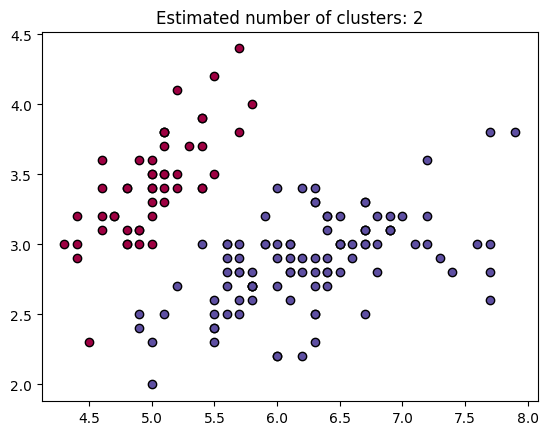

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)

if dbs:
    core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_iris[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_iris[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

---
### SKLEARN
---

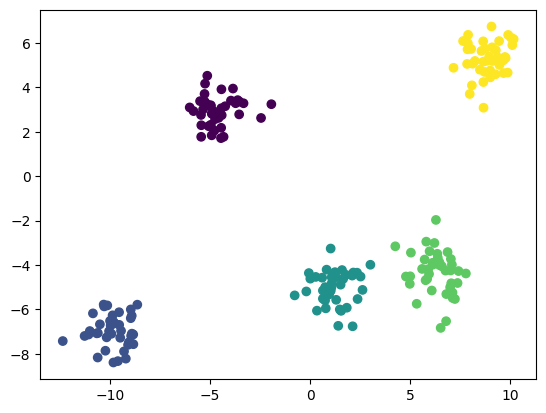

In [ ]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=.8 )

plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.show()

In [ ]:
# SI no sabemos como son los datos, primero visualizarlos
data[0][:10]

array([[ 1.24455719, -4.32531552],
       [ 2.10553236, -4.48045143],
       [ 5.76954619, -4.68986761],
       [ 0.78683538, -5.95664394],
       [ 5.8018335 , -2.95077592],
       [ 7.64009355,  6.09111406],
       [ 6.86600945, -3.42113371],
       [ 9.65322634,  5.22207495],
       [ 8.6424338 ,  6.07678499],
       [-8.61984227, -5.79106491]])

---
#### Vamos a intenter agrupar con K=2

---

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0, n_init="auto")
model.fit(data[0])

print("labels --> ", model.labels_)
print("cluster center --> ", model.cluster_centers_)

labels -->  [1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1]
cluster center -->  [[-7.13743585 -2.05593688]
 [ 5.51960118 -1.32744041]]


---
### Elbow method with KElbowVisualizer

#### Segun el método del codo, cual es el mejor valor de K?
---

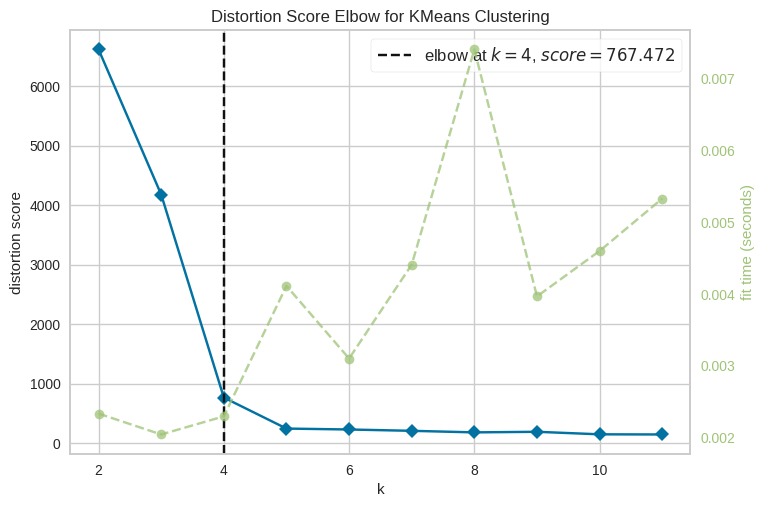

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto')

visualizer_elbow = KElbowVisualizer(model, k=(2,12))

visualizer_elbow.fit(data[0])        # Fit the data to the visualizer
visualizer_elbow.show()

---
### Silhoutte index with Silhouette Visualizer

Según el índice Silhouette, cual es el mejor valor de K?

---

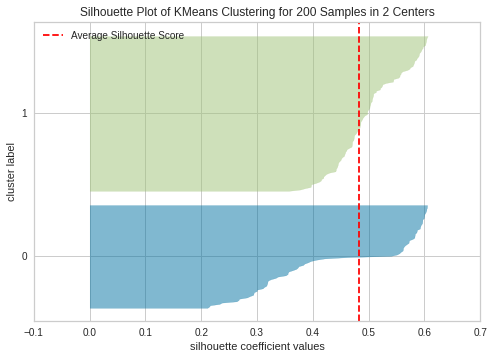

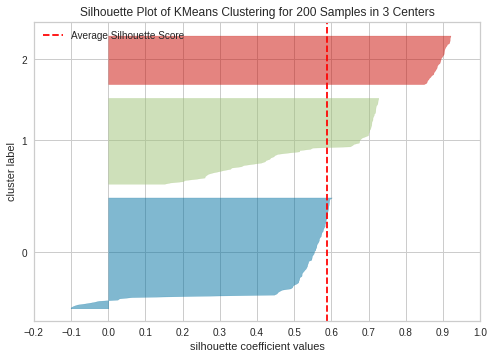

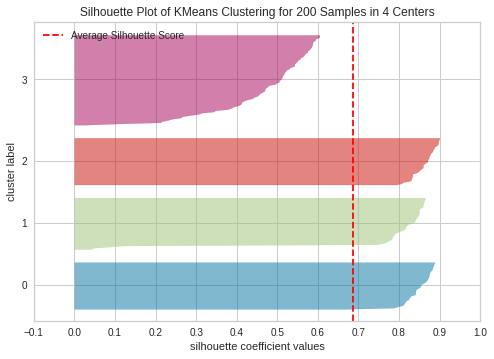

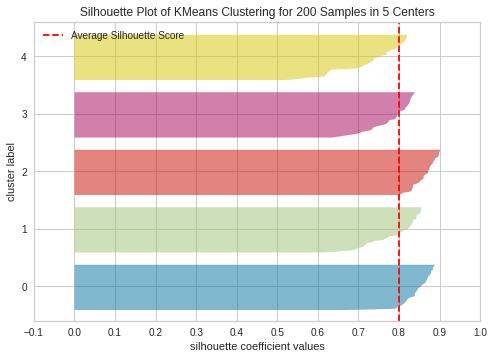

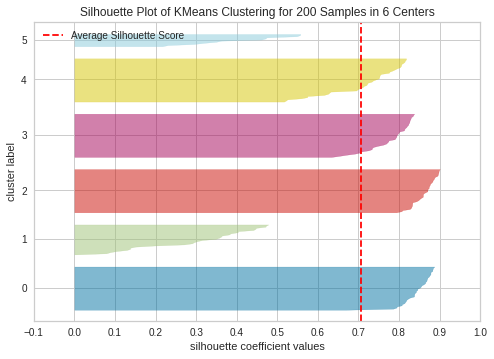

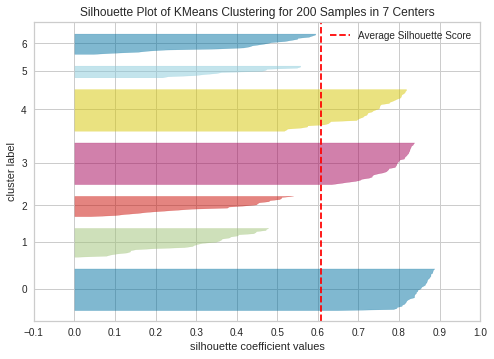

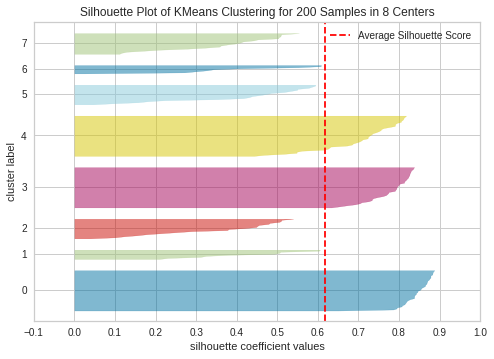

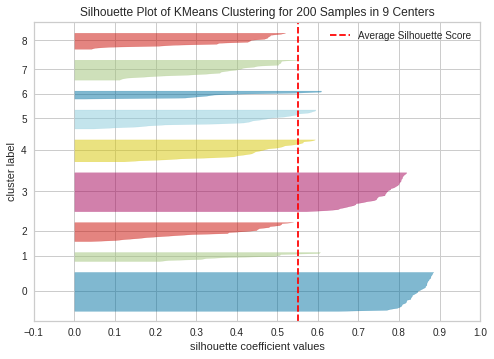

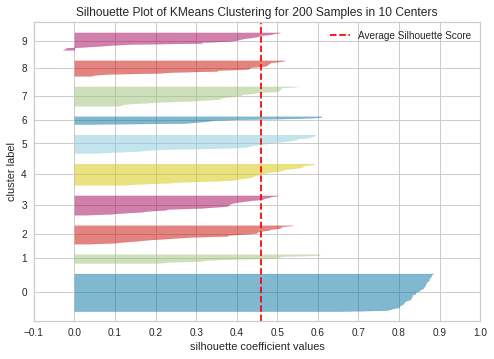

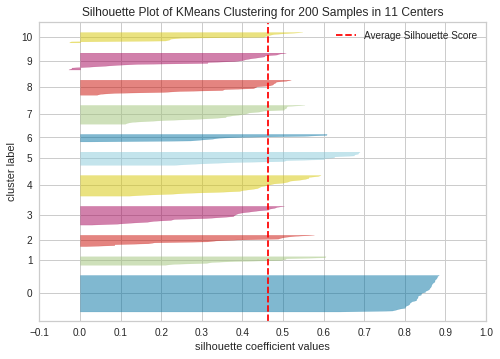

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=0, n_init="auto")
    visualizer_sl = SilhouetteVisualizer(model, colors='yellowbrick')


    visualizer_sl.fit(data[0])        # Fit the data to the visualizer
    visualizer_sl.show()




In [ ]:
from sklearn.metrics import silhouette_score

silhouette_dict = {}
for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data[0])
    silhouette_avg = silhouette_score(data[0], model.labels_)
    silhouette_dict[k] = silhouette_avg

print("Silhouette index --> ")
for k,v in silhouette_dict.items():
    print(f"K={k} --> index_silh = {v:.3f}")

print("-----------------------------------------------------------------------")
print("Best K using silhouette index")
print("K --> ",max(silhouette_dict, key=silhouette_dict.get))

Silhouette index --> 
K=2 --> index_silh = 0.525
K=3 --> index_silh = 0.640
K=4 --> index_silh = 0.790
K=5 --> index_silh = 0.803
K=6 --> index_silh = 0.726
K=7 --> index_silh = 0.619
K=8 --> index_silh = 0.486
K=9 --> index_silh = 0.499
K=10 --> index_silh = 0.453
K=11 --> index_silh = 0.367
-----------------------------------------------------------------------
Best K using silhouette index
K -->  5


---
## Clustering Aglomerativo (jerárquico)

---

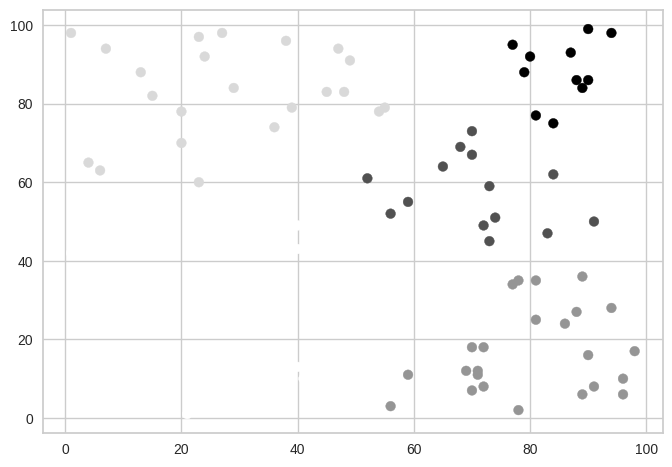

In [ ]:
# init model
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)


# load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# generate random dataframe
df = pd.DataFrame({'x': np.random.randint(1, 100, 100), 'y': np.random.randint(1, 100, 100)}, columns=['x', 'y'])


# cluster
clustered = model.fit_predict(df)


# plot results
plt.scatter(df['x'], df['y'], c=clustered)
plt.show()

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

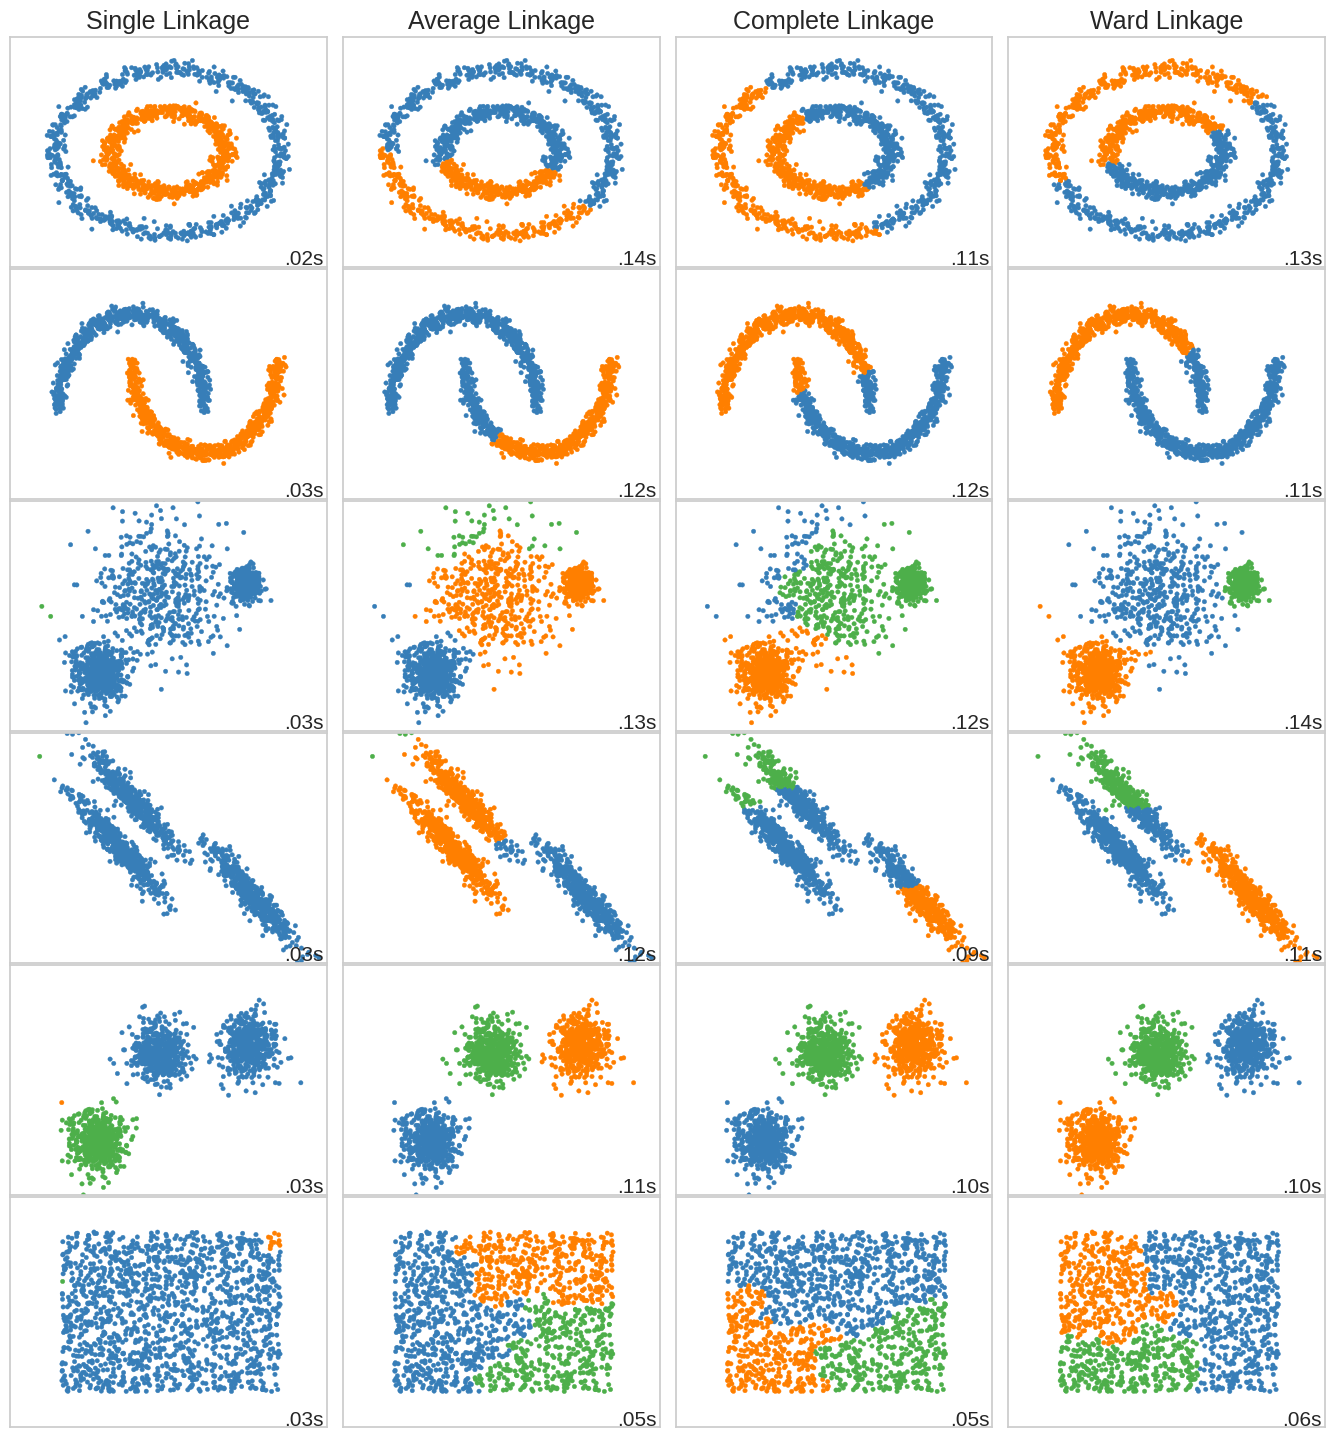

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()